### Exploring the data for better understanding of the problem.
"""
Author: vickyparmar
File: explore.ipynb
Created on: 09-09-2022, Fri, 15:15:59
"""
"""
Last modified by: vickyparmar
Last modified on: 09-9-2022, Fri, 15:16:55
"""

In [1]:
# Imports
from pathlib import Path
import pandas as pd
import holidays
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data path
data = Path("/Users/vickyparmar/data/kaggle")

In [3]:
# Train and Test data
train = pd.read_csv(data / "tabular-playground-series-sep-2022/train.csv")
test = pd.read_csv(data / "tabular-playground-series-sep-2022/test.csv")

In [4]:
train.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [5]:
train.shape

(70128, 6)

In [6]:
test.head()

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


In [7]:
test.shape

(17520, 5)

In [8]:
train.dtypes

row_id       int64
date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

In [9]:
train['date'] = pd.to_datetime(train['date'])

In [10]:
train.dtypes

row_id               int64
date        datetime64[ns]
country             object
store               object
product             object
num_sold             int64
dtype: object

In [11]:
train.describe()

,row_id,num_sold
count,70128.000000,70128.000000
mean,35063.500000,194.296986
std,20244.354176,126.893874
min,0.000000,19.000000
25%,17531.750000,95.000000
50%,35063.500000,148.000000
75%,52595.250000,283.000000
max,70127.000000,986.000000


In [12]:
train.isna().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [13]:
train.columns

Index(['row_id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [14]:
# Getting the day of the week
def get_day(date):
    days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
    day_num = date.weekday()
    return days[day_num]

In [15]:
get_day(train.iloc[0, 1])

'Sunday'

In [16]:
# Checking for weekends
def is_weekend(day):
    if day.lower() in ["saturday", "sunday"]:
        return 1
    return 0

In [17]:
is_weekend("Sunday")

1

In [18]:
# Checking for holidays
def is_holiday(row):
    if row["date"] in holidays.CountryHoliday(row["country"]):
        return 1
    return 0

In [19]:
is_holiday(train.iloc[0, :])

1

In [20]:
# Getting the season of the year
def get_season(date):
    if date.month in range(3, 6):
        return "Spring"
    elif date.month in range(6, 9):
        return "Summer"
    elif date.month in range(9, 12):
        return "Autumn"
    else:
        return "Winter"

In [21]:
get_season(train.iloc[0, 1])

'Winter'

### Seasons according to Hemisphere
For a more robust model to be deployed across the globe, one should consider fine-tuning the seasons

In [22]:
train["day"] = train["date"].apply(lambda dt: get_day(dt))
train["is_weekend"] = train["day"].apply(lambda d: is_weekend(d))
train["season"] = train["date"].apply(lambda dt: get_season(dt))
train["is_holiday"] = train.apply(lambda row: is_holiday(row), axis=1)

In [23]:
train

,row_id,date,country,store,product,num_sold,day,is_weekend,season,is_holiday
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,Sunday,1,Winter,1
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,Sunday,1,Winter,1
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,Sunday,1,Winter,1
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,Sunday,1,Winter,1
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,Sunday,1,Winter,1
...,...,...,...,...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614,Thursday,0,Winter,0
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215,Thursday,0,Winter,0
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158,Thursday,0,Winter,0
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135,Thursday,0,Winter,0


In [24]:
for col in ["country", "store", "product", "day", "is_weekend", "season", "is_holiday"]:
    print(f"{train[col].value_counts()}")
    print("-"*100)

Poland     11688
Belgium    11688
Germany    11688
Italy      11688
France     11688
Spain      11688
Name: country, dtype: int64
----------------------------------------------------------------------------------------------------
KaggleRama    35064
KaggleMart    35064
Name: store, dtype: int64
----------------------------------------------------------------------------------------------------
Kaggle Advanced Techniques          17532
Kaggle for Kids: One Smart Goose    17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Name: product, dtype: int64
----------------------------------------------------------------------------------------------------
Sunday       10032
Monday       10032
Tuesday      10032
Wednesday    10032
Thursday     10032
Friday        9984
Saturday      9984
Name: day, dtype: int64
----------------------------------------------------------------------------------------------------
0    50112
1    20016
Name: is_weekend, dtype: 

In [25]:
(train.date.max()-train.date.min())

Timedelta('1460 days 00:00:00')

In [26]:
type(train.iloc[0, 1])

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
train

,row_id,date,country,store,product,num_sold,day,is_weekend,season,is_holiday
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,Sunday,1,Winter,1
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,Sunday,1,Winter,1
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,Sunday,1,Winter,1
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,Sunday,1,Winter,1
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,Sunday,1,Winter,1
...,...,...,...,...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614,Thursday,0,Winter,0
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215,Thursday,0,Winter,0
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158,Thursday,0,Winter,0
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135,Thursday,0,Winter,0


<AxesSubplot:xlabel='date', ylabel='num_sold'>

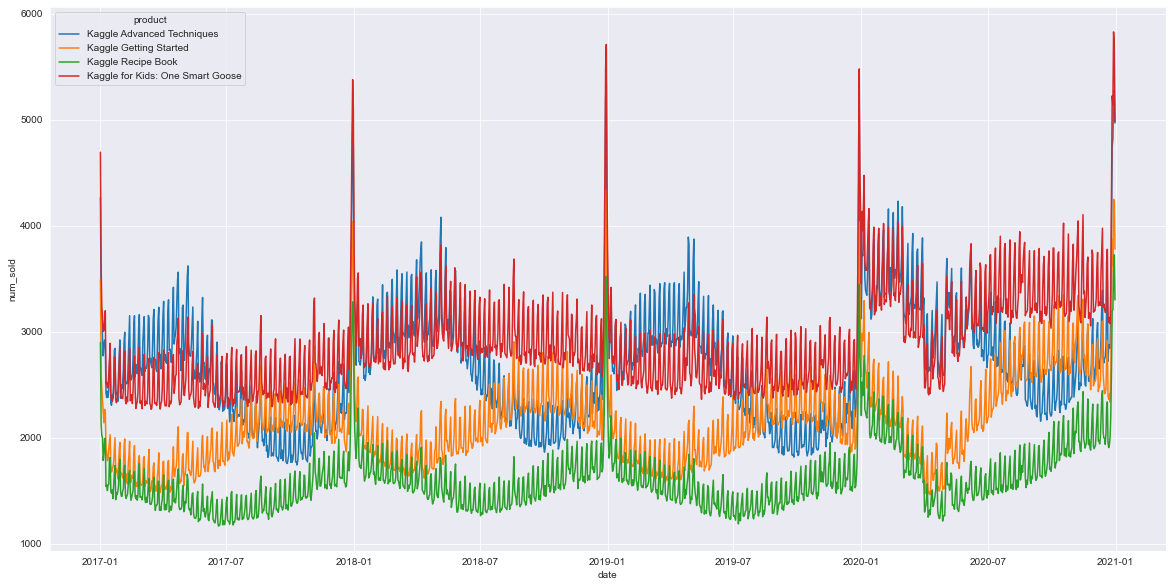

In [28]:
product_df = train.groupby(["date", "product"])["num_sold"].sum().reset_index()
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=product_df, x="date", y="num_sold", hue="product")

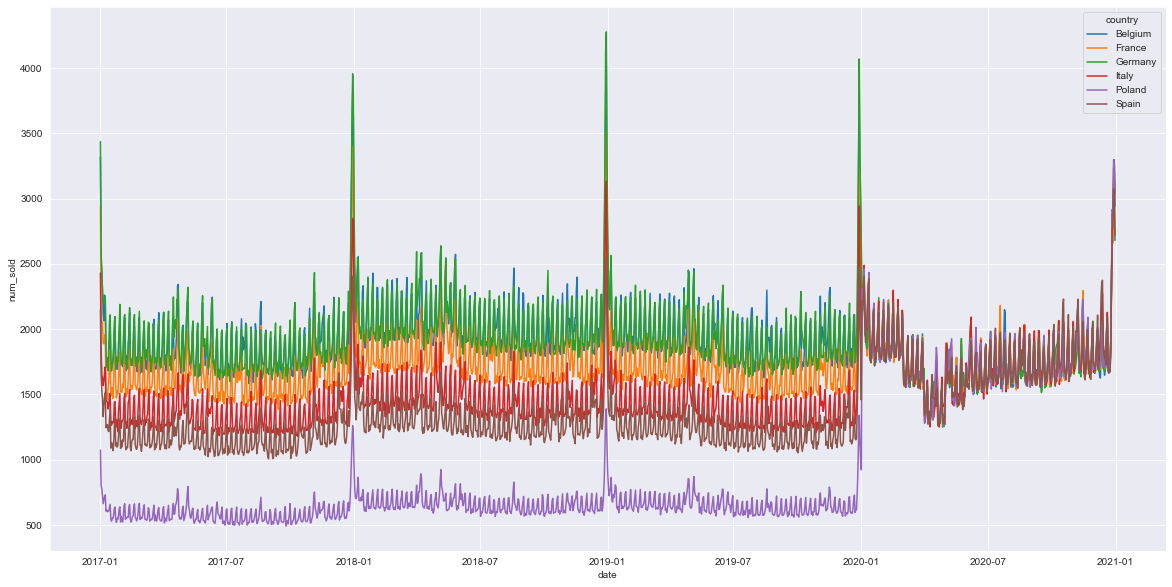

In [30]:
product_df = train.groupby(["date","country"])["num_sold"].sum().reset_index()
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=product_df, x="date", y="num_sold", hue="country");